In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df=pd.read_csv(r'C:\Users\nazia\Downloads\archive\prices.csv')

In [4]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [6]:
df.describe()


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [7]:
df.shape

(851264, 7)

In [8]:
df['symbol'].nunique()

501

In [9]:
df1=df[df['symbol']=='AMZN']

In [10]:
df1.head()

,date,symbol,open,close,low,high,volume
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
751,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
1219,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
1687,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
2155,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


In [11]:
np.round(df1.median(),2)

C:\Users\nazia\AppData\Local\Temp/ipykernel_13576/3008891578.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  np.round(df1.median(),2)


open          282.50
close         282.92
low           279.87
high          285.07
volume    3890700.00
dtype: float64

In [12]:
df1['date']=pd.to_datetime(df1['date'])

C:\Users\nazia\AppData\Local\Temp/ipykernel_13576/3454300950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']=pd.to_datetime(df1['date'])


In [13]:
print("Minimum date value : {}".format(df1['date'].min()))
print("Maximum date value : {}".format(df1['date'].max()))

Minimum date value : 2010-01-04 00:00:00
Maximum date value : 2016-12-30 00:00:00


In [14]:
df1.drop(['symbol'], axis=1, inplace=True)

C:\Users\nazia\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
df1.corr()['close']

open      0.999581
close     1.000000
low       0.999832
high      0.999811
volume   -0.238560
Name: close, dtype: float64

<AxesSubplot:>

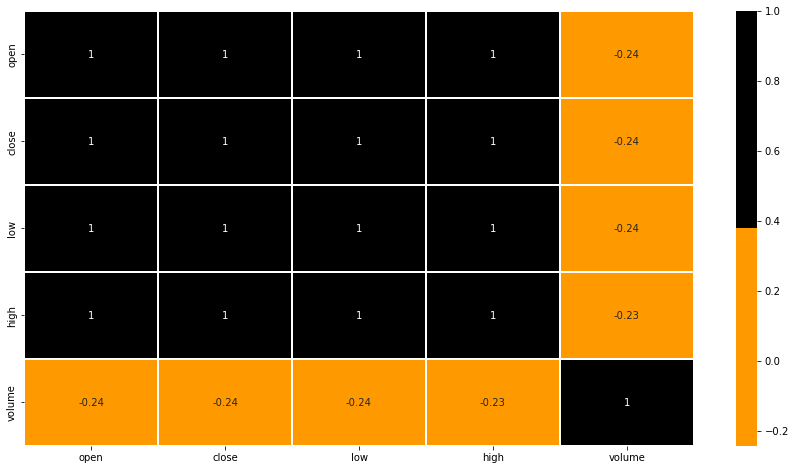

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
colors = ['#FF9900','#000000']
fig=plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot=True, cmap=[colors[0],colors[1]], linecolor='white', linewidth=2 )

In [17]:
X=df1[['volume','open']]
y=df1['close']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
model = LinearRegression()
model.fit(X_train,y_train)
#set_config(display='diagram')
pred=model.predict(X_test)
sc=np.round(model.score(X_test, y_test),2) * 100
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)

In [21]:
print("R2 score: ", r2 )
print("Accuracy score: ", sc )
print("MAE: ", mae )
print("MSE: ", mse)


R2 score:  1.0
Accuracy score:  100.0
MAE:  66.39
MSE:  66.39


Text(800000, 540, 'Mean Absolute error : 66.39')

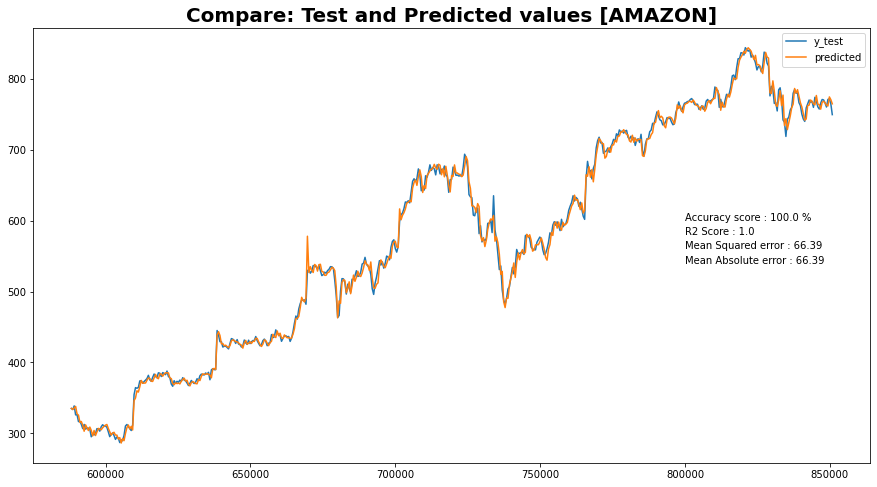

In [22]:
fig=plt.figure(figsize=(15,8))
p=pd.Series(pred, index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test','predicted'])
plt.title("Compare: Test and Predicted values [AMAZON]", size=20, weight='bold')
plt.text(x=800000, y=600,s='Accuracy score : {} %'.format(sc))
plt.text(x=800000, y=580,s='R2 Score : {}'.format(r2))
plt.text(x=800000, y=560,s='Mean Squared error : {}'.format(mse))
plt.text(x=800000, y=540,s='Mean Absolute error : {}'.format(mae))
